In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6363636363636364

In [9]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(DecisionTreeClassifier(),X_train,y_train,scoring='accuracy'))

np.float64(0.6304805491990847)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [11]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second', kbin_fare, [1])
    ])

In [12]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [14]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [15]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [16]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [17]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
799,30.0,8.0,24.1500,8.0,"(28.0, 30.0]","(18.75, 26.0]"
426,28.0,7.0,26.0000,9.0,"(25.0, 28.0]","(18.75, 26.0]"
805,31.0,8.0,7.7750,2.0,"(30.0, 32.0]","(7.25, 7.775]"
811,39.0,11.0,24.1500,8.0,"(38.0, 42.0]","(18.75, 26.0]"
370,25.0,6.0,55.4417,12.0,"(23.0, 25.0]","(51.479, 76.292]"


In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [19]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [20]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6358763693270735)

In [21]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second', kbin_fare, [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6331377151799686


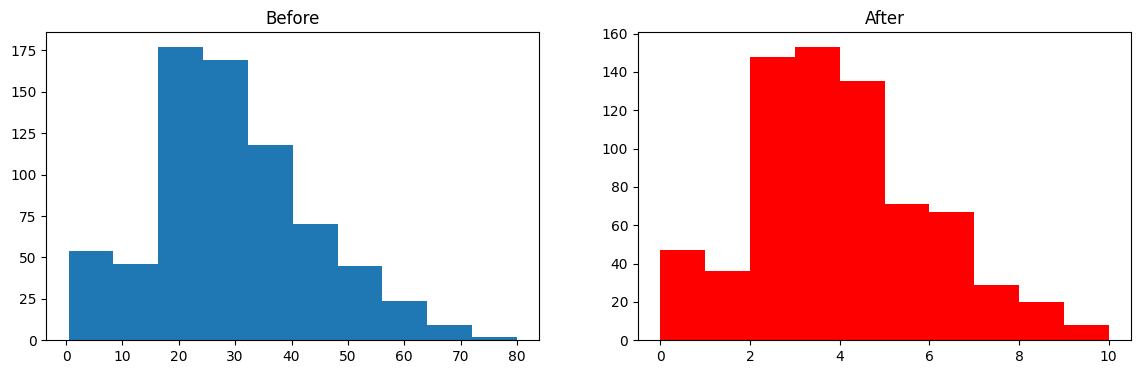

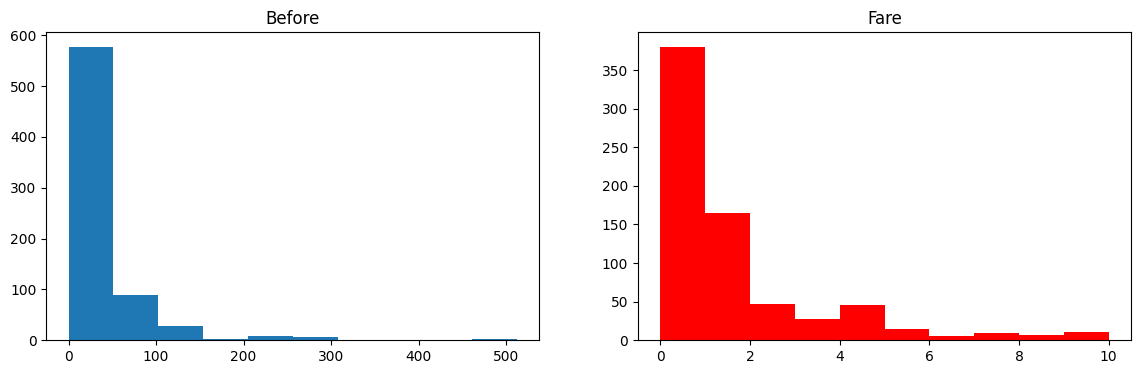

In [26]:
discretize(11,'kmeans')